<a href="https://colab.research.google.com/github/SefiyeArican/plant_seedlings_classification/blob/main/PlantseedlingsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DRIVE ÜZERİNDEN VERİSETİNE ERİŞİM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/plant-seedlings-classification.zip"

with zipfile.ZipFile(os.path.join(dataset_path), 'r') as zip_ref:
    zip_ref.extractall("/content/")

VERİ YÜKLEME VE İNCELEME ADIMLARI

In [3]:
import os

# Veri setinin bulunduğu dizin
data_dir = '/content'

# Train sınıfı ve alt sınıflar için
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        print(f"Sınıf: {class_name}")
        # Sınıf dizinindeki alt dizinlerin listesi
        sub_classes = [sub_class for sub_class in os.listdir(class_dir) if os.path.isdir(os.path.join(class_dir, sub_class))]
        for sub_class_name in sub_classes:
            sub_class_dir = os.path.join(class_dir, sub_class_name)
            print(f"Alt Sınıf: {sub_class_name}")
            image_files = [file for file in os.listdir(sub_class_dir) if file.endswith(('jpg', 'jpeg', 'png'))]
            if image_files:
                print(f"{len(image_files)} görüntü dosyası bulundu.")
            # else:
            #     print("Bu alt sınıfta görüntü dosyası bulunamadı.")
    # else:
    #     print(f"{class_name} bir sınıf dizini değil.")

print(" ")
# Test sınıfı için
test_dir = os.path.join(data_dir, 'test')
if os.path.isdir(test_dir):
    image_files = [file for file in os.listdir(test_dir) if file.endswith(('jpg', 'jpeg', 'png'))]
    if image_files:
        print(f"Sınıf: test")
        print(f"{len(image_files)} görüntü dosyası bulundu.")
#     else:
#         print("Test sınıfında görüntü dosyası bulunamadı.")
# else:
#     print("Test sınıfı bulunamadı.")

Sınıf: .config
Alt Sınıf: logs
Alt Sınıf: configurations
Sınıf: test
Sınıf: drive
Alt Sınıf: .shortcut-targets-by-id
Alt Sınıf: .file-revisions-by-id
Alt Sınıf: MyDrive
Alt Sınıf: .Trash-0
Sınıf: validation
Alt Sınıf: Charlock
78 görüntü dosyası bulundu.
Alt Sınıf: Scentless Mayweed
103 görüntü dosyası bulundu.
Alt Sınıf: Cleavers
57 görüntü dosyası bulundu.
Alt Sınıf: Loose Silky-bent
130 görüntü dosyası bulundu.
Alt Sınıf: Shepherds Purse
46 görüntü dosyası bulundu.
Alt Sınıf: Maize
44 görüntü dosyası bulundu.
Alt Sınıf: Black-grass
52 görüntü dosyası bulundu.
Alt Sınıf: Common wheat
44 görüntü dosyası bulundu.
Alt Sınıf: Sugar beet
77 görüntü dosyası bulundu.
Alt Sınıf: Fat Hen
95 görüntü dosyası bulundu.
Alt Sınıf: Small-flowered Cranesbill
99 görüntü dosyası bulundu.
Alt Sınıf: Common Chickweed
122 görüntü dosyası bulundu.
Sınıf: train
Alt Sınıf: Charlock
390 görüntü dosyası bulundu.
Alt Sınıf: Scentless Mayweed
516 görüntü dosyası bulundu.
Alt Sınıf: Cleavers
287 görüntü dosyası 

Veri setinde 'test' ve 'train' adında iki sınıf bulunmaktadır. Train sınıfının toplam 12 alt sınıfı bulunmaktadır. Bunlar; Black-grass, Charlock, Cleavers, Common Chickweed, Common wheat, Fat Hen, Loose Silky-bent, Maize, Scentless Mayweed, Shepherds Purse, Small-flowered Cranesbill, Sugar beet. Train sınıfına ait toplamda 4723, test sınıfına ait 794 görüntü bulunmaktadır.

SINIF DAĞILIMI TABLOSU

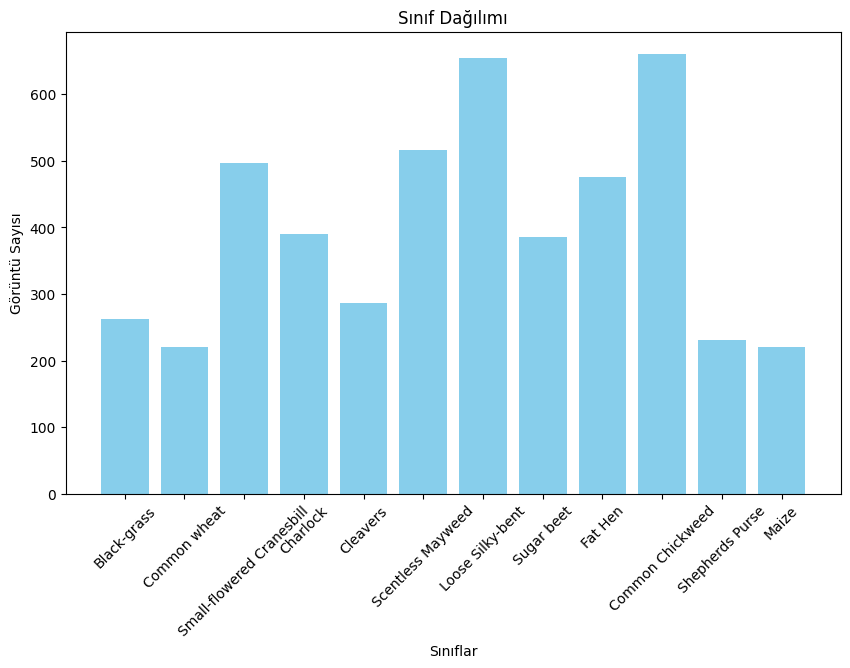

In [4]:
import matplotlib.pyplot as plt

# Sınıf adları ve sınıf içindeki görüntü sayıları
class_names = ['Black-grass','Common wheat', 'Small-flowered Cranesbill', 'Charlock', 'Cleavers', 'Scentless Mayweed',
              'Loose Silky-bent', 'Sugar beet', 'Fat Hen', 'Common Chickweed', 'Shepherds Purse', 'Maize']
class_counts = [263, 221, 496, 390, 287, 516, 654, 385, 475, 661, 231, 221]

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Sınıflar')
plt.ylabel('Görüntü Sayısı')
plt.title('Sınıf Dağılımı')
plt.xticks(rotation=45)
plt.show()

Sınıflar arası veri dağılımı dengesiz.

ÖRNEK GÖRÜNTÜ GÖRSELLEŞTİRMESİ

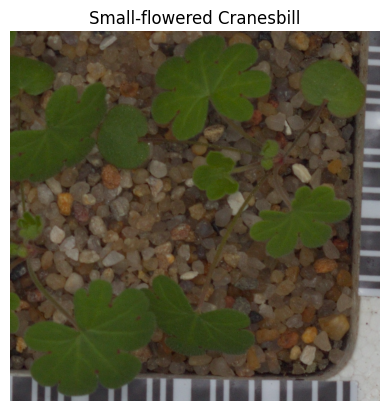

In [5]:
import matplotlib.pyplot as plt
import cv2
import os
import random

data_dir = '/content'

# train sınıfının 12 alt sınıfı olduğu için train ve test ana sınıflarını ayrı ayrı çekmemiz gerekiyor.
# train sınıfı verileri
class_train =  os.path.join(data_dir, 'train')
train_sub_classes = [sub_class for sub_class in os.listdir(class_train) if os.path.isdir(os.path.join(class_train, sub_class))]

# test sınıfı verileri
class_test = os.path.join(data_dir, 'test')

# Rastgele olarak 'train' alt sınıflarından veya 'test' sınıfından bir veri seçme işlemi
all_classes = ['test'] + train_sub_classes
selected_class = random.choice(all_classes)

# seçilecek ana sınıfa göre dosya yolu oluşturuyoruz.
if selected_class == 'test':
    selected_class_path = class_test
else:
    selected_class_path = os.path.join(class_train, selected_class)

sample_image_path = os.path.join(selected_class_path, random.choice(os.listdir(selected_class_path)))

image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.title(selected_class)
plt.show()

VALIDATION SETİ OLUŞTURMA

In [6]:
import os
import random
import shutil

def create_validation(validation_split=0.2):
    if os.path.isdir('validation'):
        print('Validation directory already created!')
        print('Process Terminated')
        return
    os.mkdir('validation')
    for f in os.listdir('train'):
        train_class_path= os.path.join('train', f)
        if os.path.isdir(train_class_path):
            validation_class_path= os.path.join('validation', f)
            os.mkdir(validation_class_path)
            files_to_move= int(0.2*len(os.listdir(train_class_path)))

            for i in range(files_to_move):
                random_image= os.path.join(train_class_path, random.choice(os.listdir(train_class_path)))
                shutil.move(random_image, validation_class_path)
    print('Validation set created successfully using {:.2%} of training data'.format(validation_split))

create_validation()

Validation directory already created!
Process Terminated


GÖRÜNTÜLERİN İŞLENEBİLMESİ İÇİN YENİDEN BOYUTLANDIRILMASI

In [7]:
import cv2
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

ScaleTo = 150  # Yeni pixel ölçeği
seed = 7 # rastgele sayı üreteçlerinin başlangıç noktasını belirleyen bir sayı veya diziye denir ve tekrarlanabilir sonuçlar elde etmek için kullanılır.
path = '/content/train/*/*.png'
files = glob(path)

trainImg = []
trainLabel = []
j = 1
num = len(files)


for img in files:
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (ScaleTo, ScaleTo)))  # Görüntüyü yeniden ölçeklendirerek alma (Görüntüyü ScaleTo x ScaleTo boyutuna yeniden boyutlandırır.)
    trainLabel.append(img.split('/')[-2])  # Görüntünün etiketinin alınması
    j += 1

trainImg = np.asarray(trainImg)  # Train görüntü seti
trainLabel = pd.DataFrame(trainLabel)  # Train etiket seti

* trainImg: Eğitim görüntülerini depolayacak bir liste.
* trainLabel: Görüntü etiketlerini depolayacak bir liste.
* j: İşlenen dosyaların sayısını izlemek için kullanılan bir sayaç.
* num: Toplam dosya sayısı.

* cv2.imread(img): Görüntüyü dosya yolundan okur.
* cv2.resize(..., (ScaleTo, ScaleTo)): Görüntüyü ScaleTo x ScaleTo boyutuna yeniden boyutlandırır.
* trainImg.append(...): Yeniden boyutlandırılmış görüntüyü trainImg listesine ekler.
* trainLabel.append(img.split('/')[-2]): Görüntünün bulunduğu klasör adını (etiket olarak) trainLabel listesine ekler.
* img.split('/')[-2] ifadesi, dosya yolunun ikinci son elemanını (klasör adı) alır.
* print(str(j) + "/" + str(num), end="\r"): İşlenen dosya sayısını konsola yazar.
* j += 1: Sayaç bir artırılır.

YENİDEN BOYUTLANDIRMA ÖRNEK GÖRSELLERİ

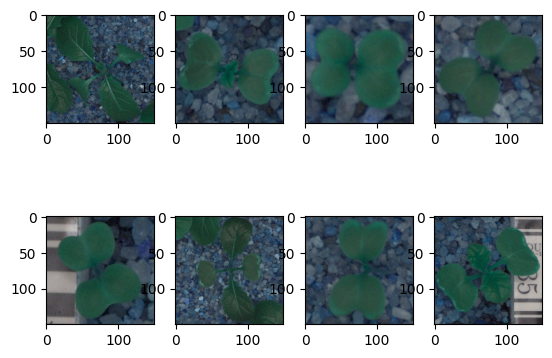

In [8]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(trainImg[i])

ARKAPLAN TEMİZLİK İŞLEMİ

Görüntülerdeki arkaplan gürültüdür. Yeşil bitkiyi maskeleme işlemi yapılarak gürültü temizlenecek. Arka planı kaldıracak maskeyi oluşturmak için RGB görüntüsünü HSV'ye dönüştürmemiz gerekir. (HSV: Hue(ton), Saturation(doygunluk), Value(değer)). HSV, RGB renk modelinin alternatifidir. HSV'de bir renk aralığını temsil etmek RGB renk uzayına göre daha kolaydır.

 Gürültüyü gidermek için önce görüntüyü bulanıklaştırmak gerekiyor. HSV görüntüsünü oluşturduktan sonra, deneysel olarak seçilen yeşil renk aralığına dayalı maske oluşturacağız, bunu boole maskesine dönüştüreceğiz ve orijinal görüntüye uygulayacağız. İzlenecek adımlar:

1. Gürültüyü kaldırmak için gauss bulanıklığı kullanılır.
2. RGB'den HSV dönüşümü .
3. Maskeleme işlemi.
4. Boolean maskeleme işlemi (bir veri kümesindeki belirli öğeleri seçmek veya filtrelemek için kullanılır).
5. Arkaplansız görüntüyü elde etme.



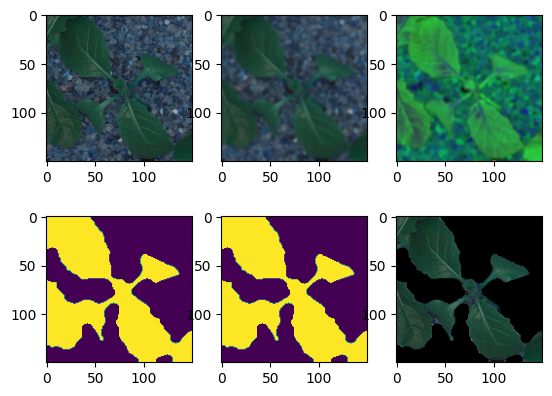

In [9]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImg:

    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   # Gauss bulanıklığı

    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  # RGB to HSV

    # Yeşil rengine göre maskeleme
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    bMask = mask > 0  # Bool maske

    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Boş görüntü oluşturma
    clear[bMask] = img[bMask]  # Başlangıç görüntüsüne boolean maskesi uygulama

    clearTrainImg.append(clear)  # Arka planı temizlenmiş görüntüleri kaydetmek için

    # Örnek çıktı
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Orijinal görüntü
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blurlu görüntü
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Maskeleme
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Arkaplansız görüntü
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

ARKAPLANDAN TEMİZLENMİŞ ÖRNEK GÖRÜNTÜLER

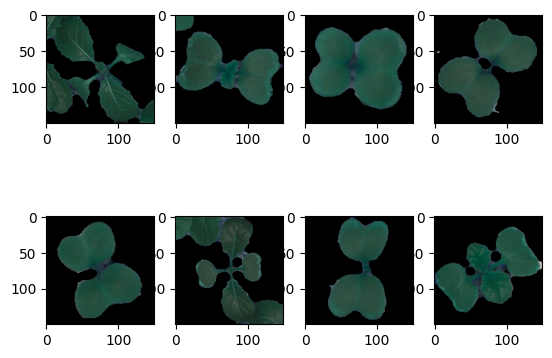

In [10]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTrainImg[i])

GÖRSELLERİ NORMALİZE ETME

[0, 255] aralığındaki piksel değerlerini [0, 1] aralığına ölçeklendirerek modelin daha hızlı eğitilmesini ve daha iyi sonuçlar elde edilmeyi sağlamış olacağız.

In [11]:
clearTrainImg = clearTrainImg / 255

TRAIN SINIFI GÖRÜNTÜLERİNİ ETİKETLENDİRME

In [12]:
!pip install keras-utils

In [13]:
!pip install --upgrade keras tensorflow

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


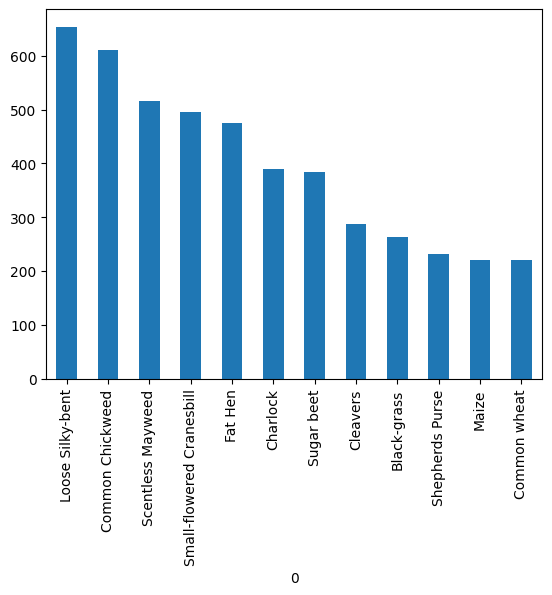

In [14]:
from keras.utils import to_categorical
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainLabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainLabel[0])

# Convert labels to one-hot encoding
clearTrainLabel = to_categorical(encodeTrainLabels)
num_classes = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_classes))

# Plot of label types numbers
trainLabel[0].value_counts().plot(kind='bar')
plt.show()


VERİ BÖLME

Verilerimiz dengesiz dğılmış durumda, bu nedenle model setinin yanlış değerlendirilmesini önlemek için stratify=clearTrainLabel diyoruz.

MODEL OLUŞTURMA

In [15]:
!pip install keras

In [18]:
!pip install tensorflow

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Farklı görseller ile karşılaştığında tutarlı çıktılar verebilmesini sağlayan fonksiyon.
def color_segment_function(img_array):
    img_array= np.rint(img_array)
    img_array= img_array.astype('uint8')
    hsv_img= cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, (24, 50, 0), (55, 255, 255))
    result = cv2.bitwise_and(img_array, img_array, mask=mask)
    result= result.astype('float64')
    return result

# image function from keras.preprocessing

# Eğitim veri üreteci oluşturma
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test veri üreteci oluşturma
test_datagen = ImageDataGenerator(
    '/content/test',
    rescale=1./255,
    preprocessing_function=color_segment_function
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',  # Eğitim verisi dizini
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Sınıf modu: categorical
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/validation',  # Doğrulama verisi dizini
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Sınıf modu: categorical
)

test_generator = test_datagen.flow_from_directory(
    '/content/test',  # Test görüntülerinin bulunduğu dizin
    target_size=(150, 150),
    batch_size=1,  # Test setinde her bir adımda sadece bir görüntü bulunduğu için batch_size=1 olarak ayarlanır
    class_mode=None,  # Sınıf etiketi olmadığı için class_mode=None olarak ayarlanır
    shuffle=False  # Test setinin sırasını korumak için shuffle=False olarak ayarlanır
)


Found 4750 images belonging to 12 classes.
Found 947 images belonging to 12 classes.
Found 0 images belonging to 0 classes.


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Test seti dizini
test_dir = '/content/test'

# Test veri üreteci oluşturma
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Test seti dizini
    target_size=(150, 150),  # Hedef görüntü boyutu
    batch_size=1,  # Yığın boyutu (burada 1 olarak ayarlandı, çünkü her seferinde tek bir görüntü alıyoruz)
    class_mode='categorical',  # Sınıf modu: categorical
    shuffle=False  # Görüntülerin karıştırılmamasını sağlar
)

# Test setinde bulunan sınıf etiketlerini almak için
class_labels = test_generator.class_indices
print("Class labels:", class_labels)


Found 0 images belonging to 0 classes.
Class labels: {}


In [17]:
!pip install PrettyTable

In [31]:
from prettytable import PrettyTable
from keras import models, layers, callbacks

#get class indices and labels. calculate class weight
label_map = {}
for k, v in train_generator.class_indices.items():
    label_map[v] = k

class_counts = pd.Series(train_generator.classes).value_counts()
class_weight = {}

for i, c in class_counts.items():
    class_weight[i] = 1.0 / c

norm_factor = np.mean(list(class_weight.values()))

for k in class_counts.keys():
    class_weight[k] = class_weight[k] / norm_factor

t = PrettyTable(['class_index', 'class_label', 'class_weight'])
for i in sorted(class_weight.keys()):
    t.add_row([i, label_map[i], '{:.2f}'.format(class_weight[i])])
print(t)

model = models.Sequential()

+-------------+---------------------------+--------------+
| class_index |        class_label        | class_weight |
+-------------+---------------------------+--------------+
|      0      |        Black-grass        |     1.30     |
|      1      |          Charlock         |     0.88     |
|      2      |          Cleavers         |     1.19     |
|      3      |      Common Chickweed     |     0.56     |
|      4      |        Common wheat       |     1.55     |
|      5      |          Fat Hen          |     0.72     |
|      6      |      Loose Silky-bent     |     0.52     |
|      7      |           Maize           |     1.55     |
|      8      |     Scentless Mayweed     |     0.66     |
|      9      |      Shepherds Purse      |     1.48     |
|      10     | Small-flowered Cranesbill |     0.69     |
|      11     |         Sugar beet        |     0.89     |
+-------------+---------------------------+--------------+


MODEL OLUŞTURMA

Model oluşturmak için Keras Sequential kullandık.

Model, üç konvolüsyonel katman ve sonunda iki tam bağlantılı katman içerir. İlk konvolüsyonel katman 32 filtre, ikinci konvolüsyonel katman 64 filtre ve son iki konvolüsyonel katman 128 filtre içerir. Her bir konvolüsyon katmanı ardından maksimum havuzlama katmanı yer alır. Ayrıca, her konvolüsyon katmanı ardından aşırı uyumu azaltmak için dropout katmanı (%10 oranında konvolüsyonel katmanlar arasında ve %40 oranında tam bağlantılı katmanlar arasında) ve her katman arasında toplu normalizasyon katmanı kullanılmıştır.

Son olarak, sınıflandırma için iki tam bağlantılı katman ve bir softmax aktivasyonlu çıkış katmanı bulunur. Çıkış katmanı, 12 sınıfın her biri için olasılık dağılımını çıkarır.

(Katmanlarda filtre sayısı olarak 64-64-128-256 hatalı çalıştı.)

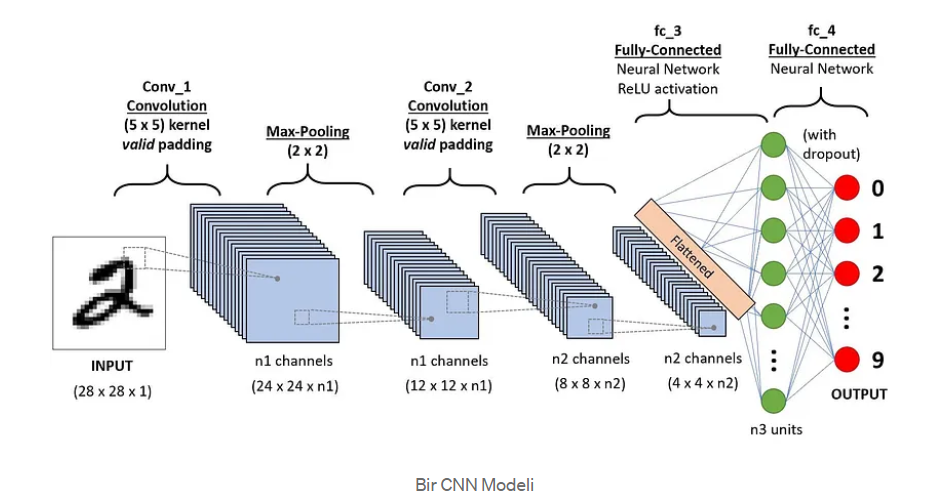

In [ ]:
!pip install tensorflow

In [34]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rastgelelik için seed değeri
seed = 7
np.random.seed(seed)

# Modeli oluştur
model = Sequential()

# İlk convolutional katman ve max pooling katmanı
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

# İkinci convolutional katman ve max pooling katmanı
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

# Üçüncü convolutional katman ve max pooling katmanı
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

# Dördüncü convolutional katman ve max pooling katmanı
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

# Flatten katmanı
model.add(Flatten())

# Dense katmanları
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(12, activation='softmax'))  # Son katman: 12 sınıf

# Modelin özetini yazdır
model.summary()

# Modeli derleme
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 36, 36, 64)       

MODEL FİTTİNG

In [21]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [40]:
import keras
from keras import models, layers, callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

history = model.fit(
    train_generator,
    class_weight=class_weight,
    steps_per_epoch=50,
    epochs=75,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint],
    verbose=1
)

# En iyi modeli .keras formatında kaydetme
model.save('final_model.keras')

Epoch 1/75
50/50 [==============================] - 158s 3s/step - loss: 1.7309 - accuracy: 0.2763 - val_loss: 1.7799 - val_accuracy: 0.4095
Epoch 2/75
50/50 [==============================] - 141s 3s/step - loss: 1.6302 - accuracy: 0.2981 - val_loss: 1.8381 - val_accuracy: 0.3621
Epoch 3/75
50/50 [==============================] - 162s 3s/step - loss: 1.5685 - accuracy: 0.3354 - val_loss: 1.6189 - val_accuracy: 0.3588
Epoch 4/75
50/50 [==============================] - 137s 3s/step - loss: 1.4535 - accuracy: 0.4100 - val_loss: 1.4423 - val_accuracy: 0.4828
Epoch 5/75
50/50 [==============================] - 156s 3s/step - loss: 1.3972 - accuracy: 0.4201 - val_loss: 1.4072 - val_accuracy: 0.4935
Epoch 6/75
50/50 [==============================] - 137s 3s/step - loss: 1.3599 - accuracy: 0.4326 - val_loss: 1.8186 - val_accuracy: 0.3362
Epoch 7/75
50/50 [==============================] - 144s 3s/step - loss: 1.2682 - accuracy: 0.4663 - val_loss: 1.2624 - val_accuracy: 0.5496
Epoch 8/75
50

In [41]:
import pickle

with open('model_history.pkl', 'wb') as f:
    pickle.dump(history, f)

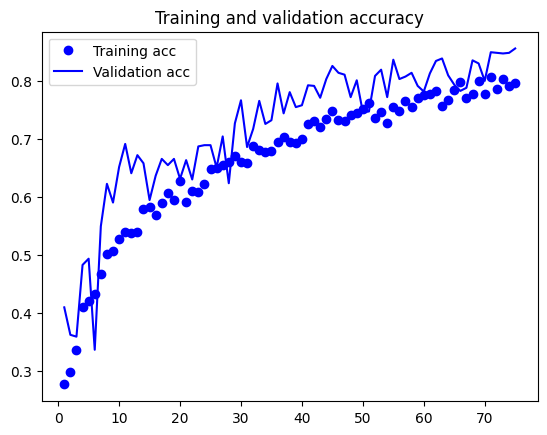

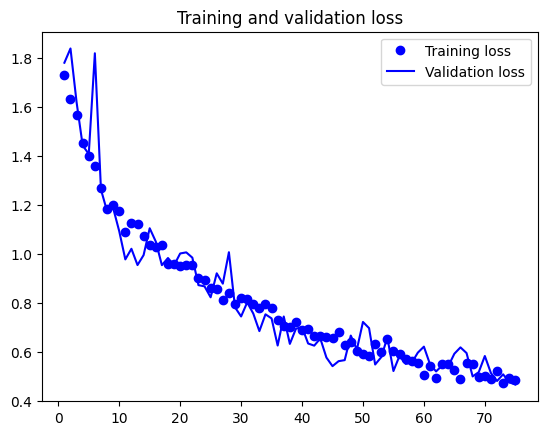

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('training_and_valuedation_acc.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('training_and_valudation_loss.png')
#plt.show()


In [52]:
pred= model.predict(test_generator, steps= test_generator.n, verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

prediction_labels = [label_map[k] for k in predicted_class_indices]
filenames= test_generator.filenames

ValueError: Unexpected value for `steps_per_epoch`. Received value is 0. Please check the docstring for `model.fit()` for supported values.

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# Modelin tahminlerini yap
predY = model.predict(test_generator)

# Tahmin edilen sınıf indekslerini belirle
predYClasses = np.argmax(predY, axis=1)

# Gerçek sınıf indekslerini belirle
trueY = test_generator.classes

# Karışıklık matrisini hesapla
confusionMTX = confusion_matrix(trueY, predYClasses)

# Karışıklık matrisini görselleştir
plot_confusion_matrix(confusionMTX, classes=test_generator.class_indices.keys())


TAHMİNLERİ CVS DOSYASINA YAZDIRMA

In [ ]:
#tahminleri csv'ye yazdırma
import csv
csvfile= open('ray_reed_submission.csv', 'w', newline='')
writer= csv.writer(csvfile)

headers= ['file', 'species']

writer.writerow(headers)
t = PrettyTable(headers)
for i, f, p in zip(range(len(filenames)), filenames, prediction_labels):
    writer.writerow([os.path.basename(f),p])
    if i <10:
        t.add_row([os.path.basename(f), p])
    elif i<13:
        t.add_row(['.', '.'])
csvfile.close()
print(t)

NameError: name 'filenames' is not defined